# **`PHY 4031 Experiment 2 : Monte Carlo Integration`**

## **`AIM`**
Monte Carlo simulation is a method for finding a mathematical solution to a problem using random numbers. Monte Carlo methods find their application in many fields including Physics. In this laboratory exercise, you will apply Monte carlo methods to

* approximate the value of an integral

## **`Approximation of an Integral`**
We wish to evaluate the integral
\begin{equation}
I = \int_{a}^{b} f(x)dx
\end{equation}

If the average value of $f(x)$ in the interval [a,b] is $\bar{f}$ then

\begin{equation}
\bar{f} = \dfrac{I}{b-a}
\end{equation}

So that

\begin{equation}
I = (b-a)\bar{f}
\end{equation}

Suppose we choose $x_{1}$, $x_{2}$, $x_{3}$,..., $x_{n}$ randomly in the interval [a,b] and use these to estimate the average value of $f(x)$:

\begin{equation}
\bar{f} = \dfrac{1}{n}f(x_{i})
\end{equation}

then 
\begin{equation}
I \approx \dfrac{b-a}{n}\sum_{n=1}^{n}f(x_{i}) = (b-a) \cdot \bar{f}
\end{equation}

This is the Monte Carlo integration. Even integrals of complex functions can be approximated using this method. The larger the value of $n$ the more accurate the approximation.

### **`Exercise 1`**
In this exercise you are going to use the Monte carlo integration to approxomate the integral of a somewhat complex function.

\begin{equation}
f(x) = \int_{0}^{2\pi}e^{-x}\sin{x}
\end{equation}

The exact value, from integration by parts is

$$ ei = \dfrac{1}{2}\left(1 - e^{2\pi}\right) = 0.4990663$$

* Import **`numpy`** using the alias **`np`**

In [1]:
import numpy as np

* Save the contents of **`np`** module in a variable **`contents`** using the **`dir()`** function.

In [2]:
contents = dir(np)

* Print the list **`contents`**.

In [3]:
print(contents)

['ALLOW_THREADS', 'AxisError', 'BUFSIZE', 'CLIP', 'ComplexWarning', 'DataSource', 'ERR_CALL', 'ERR_DEFAULT', 'ERR_IGNORE', 'ERR_LOG', 'ERR_PRINT', 'ERR_RAISE', 'ERR_WARN', 'FLOATING_POINT_SUPPORT', 'FPE_DIVIDEBYZERO', 'FPE_INVALID', 'FPE_OVERFLOW', 'FPE_UNDERFLOW', 'False_', 'Inf', 'Infinity', 'MAXDIMS', 'MAY_SHARE_BOUNDS', 'MAY_SHARE_EXACT', 'ModuleDeprecationWarning', 'NAN', 'NINF', 'NZERO', 'NaN', 'PINF', 'PZERO', 'RAISE', 'RankWarning', 'SHIFT_DIVIDEBYZERO', 'SHIFT_INVALID', 'SHIFT_OVERFLOW', 'SHIFT_UNDERFLOW', 'ScalarType', 'Tester', 'TooHardError', 'True_', 'UFUNC_BUFSIZE_DEFAULT', 'UFUNC_PYVALS_NAME', 'VisibleDeprecationWarning', 'WRAP', '_CopyMode', '_NoValue', '_UFUNC_API', '__NUMPY_SETUP__', '__all__', '__builtins__', '__cached__', '__config__', '__deprecated_attrs__', '__dir__', '__doc__', '__expired_functions__', '__file__', '__former_attrs__', '__future_scalars__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version

* Create a variable **`N`** and set its value to **`50000`**.

In [4]:
N = 50000

* Print the variable **`N`**

In [5]:
print(N)

50000


* Create variable **`a`** and set it to **`0`**

In [6]:
a = 0

* Print variable **`a`**

In [7]:
print(a)

0


* From **`numpy`** import the variable **`pi`**.

In [8]:
from numpy import pi

* Print out variable **`pi`**

In [9]:
print(pi)

3.141592653589793


* Create variable **`b`** and set it to $2\pi$

In [10]:
b = 2*pi

* Print variable **`b`**

In [11]:
print(b)

6.283185307179586


* Import **`rand()`** function from **`numpy.random`** module 

In [12]:
from numpy.random import rand

* Display help on **`rand()`**

In [13]:
help(rand)

Help on built-in function rand:

rand(...) method of numpy.random.mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `random_sample`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Examples
    --------
    >>> np.random.rand(3,2)
    arra

* Generate an numpy array of **`N`** real random numbers in the range **`[0,1)`** and store them in variable **`E`**.

In [14]:
E = rand(N)

* Print out numpy array **`E`**.

In [15]:
print(E)

[0.29839938 0.57380859 0.48878667 ... 0.3402751  0.92312818 0.75564826]


* Print out the number of items in numpy array **`E`** using attribute **`size`**.

In [16]:
print(np.size(E))

50000


* Create a random numpy array $x$ of **`N`** real random numbers in the interval $\ a \le x \le b$ using the random array **`E`** as follows

\begin{equation*}
 x = a + (b - a) \cdot \epsilon
\end{equation*}

In [17]:
x = a + (b - a) * E

* Print random numpy array $x$ 

In [18]:
print(x)

[1.87489863 3.60534573 3.07113725 ... 2.1380115  5.80018542 4.74787803]


* Print the size of random numpy array $x$

In [19]:
print(np.size(x))

50000


* Create the lambda function

\begin{equation*}
f(x) = e^{-x} \sin(x)
\end{equation*}

In [20]:
f = lambda x: np.exp(-x) * np.sin(x)

* Evaluate the function $f(x)$ at $x$ and store the value in variable $y$.
\begin{equation*}
y = f(x)
\end{equation*}

In [21]:
y = f(x)

* Print out the random numpy array $y$.

In [22]:
print(y)

[ 0.14633328 -0.01215696  0.0032642  ...  0.09942767 -0.00140585
 -0.00866461]


* Import **`matplotlib.pyplot`** module using alias **`plt`**

In [23]:
import matplotlib.pyplot as plt

* Create a scatter plot of random arrays $x$ against $y$

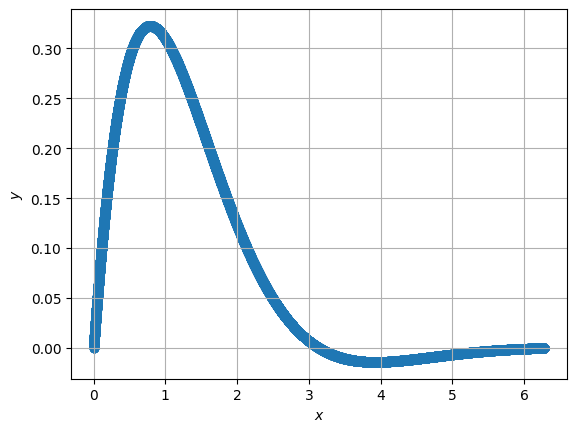

In [24]:
# create plot figure
plt.figure()
# create scatter plot of y against x
plt.scatter(x, y)
# add y label "$y$"
plt.ylabel("$y$")
# add x label "$x$"
plt.xlabel("$x$")
# add grid
plt.grid(True)
# show grid 
plt.show()


* Calculate the mean value of random numpy array $y$ and save it as **`average`** using the numpy **`mean`** function

\begin{equation*}
\bar{y} = \dfrac{\sum y}{N}
\end{equation*}

In [25]:
average = np.mean(y)

* Print out **`average`**

In [26]:
print(average)

0.0784186638446507


* Next, we now calculate the integral **`I`** using the mathematical expression.

\begin{equation*}
I = (b-a)\cdot \bar{y} 
\end{equation*}

In [27]:
I = (b - a) * average

* Print out the integral **`I`**

In [28]:
print(I)

0.4927189964773643
